# Mobile Robotics Homework 2
September 25, 2023
Author: Ipeknaz Icten

## Question 1: Simulating Robot Motion

In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
def calculate_velocity(trajectory):
    return (0.04 * (trajectory[0] + trajectory[1]) / 2)

In [76]:
def calculate_theta(trajectory):
    return (((trajectory[1] - trajectory[0]) * 0.04) / (2 * 0.11))

In [77]:
def move_robot(trajectory, curr_pt, step):
    vel = calculate_velocity(trajectory)
    theta = calculate_theta(trajectory)
    
    # Update x and y coordinates using previous theta
    new_x = curr_pt[0] + np.cos(curr_pt[2])*vel*step
    new_y = curr_pt[1] + np.sin(curr_pt[2])*vel*step
    new_t = curr_pt[2] + theta*step

    return [new_x, new_y, new_t]


In [78]:
def robot_motion(step_size):

    trajectories = [
        [ 12.0,  16.0, 3.0],
        [ 10.0, -10.0, 2.0],
        [  4.0,  12.0, 3.0],
        [ -18.0,  8.0, 1.0]
    ]

    robot_axis_points = [[0.0, 0.0, 0.0]]

    for trajectory in trajectories:
        rep = int(int(trajectory[2]) / step_size)
        
        for j in range(rep):
            pt = move_robot(trajectory, robot_axis_points[-1], step_size)
            robot_axis_points.append(pt)
    
    return robot_axis_points
            

#### Section A

In [79]:
# Run through the trajectory with step size = 0.5 s
pts1 = robot_motion(0.5)
pts1 = np.array(pts1)

In [80]:
# Run through the trajectory with step size = 0.25 s
pts2 = robot_motion(0.25)
pts2 = np.array(pts2)

In [81]:
#Run through the trajectory with step size = 0.125 s
pts3 = robot_motion(0.125)
pts3 = np.array(pts3)

#### Section B

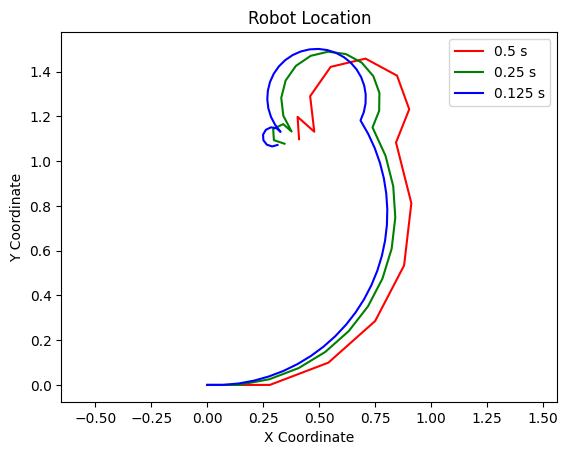

In [82]:
plt.plot(pts1[:,0],pts1[:,1], color='r', label='0.5 s')
plt.plot(pts2[:,0],pts2[:,1], color='g', label='0.25 s')
plt.plot(pts3[:,0],pts3[:,1], color='b', label='0.125 s')

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Robot Location")
plt.legend()

plt.axis('equal')
plt.show()

#### Section C

Question 2 shows that as the timestamp gets smaller, the robot path becomes smoother and robot location at any given time becomes more accurate. This is due to the fact that with a smaller timestamp, x and y coordinates of the robot are updated more frequently (leading to a smaller accumulation in approximation errors over time). 

Large timestamps lead to systemmatic errors in calculting robot location. As the interval between location updates increases, the error in calculating robot location accumulates at a constant rate. This leads to a shift in the robot path (as compared to the path calculated with a smaller step size) but not a difference in the overall robot path shape, as seen in Question 2.